<h1 style="text-align: center">Data Preprocessing</h1>

## About data
Every two years, the City of Somerville sends out a happiness survey to a random sample of Somerville residents. The survey asks residents to rate their personal happiness, wellbeing, and satisfaction with City services. This combined dataset includes the survey responses from 2011 to 2021.

In [532]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Somerville_Happiness_Survey_Responses.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10744 entries, 0 to 10743
Data columns (total 45 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Combined_ID                                                                                   10744 non-null  int64  
 1   Year                                                                                          10744 non-null  int64  
 2   How.happy.do.you.feel.right.now                                                               10522 non-null  float64
 3   How.satisfied.are.you.with.your.life.in.general                                               10516 non-null  float64
 4   How.satisfied.are.you.with.Somerville.as.a.place.to.live                                      4499 non-null   float64
 5   In.general..how.similar.a

,Combined_ID,Year,How.happy.do.you.feel.right.now,How.satisfied.are.you.with.your.life.in.general,How.satisfied.are.you.with.Somerville.as.a.place.to.live,In.general..how.similar.are.you.to.other.people.you.know,When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself,How.satisfied.are.you.with.your.neighborhood,How.proud.are.you.to.be.a.Somerville.resident,How.would.you.rate.the.following..The.availability.of.information.about.city.services,...,Precinct,How.anxious.did.you.feel.yesterday,How.satisfied.are.you.with.the.quality.and.number.of.transportation.options.available.to.you,Do.you.feel.the.City.is.headed.in.the.right.direction.or.is.it.on.the.wrong.track,How.safe.do.you.feel.crossing.a.busy.street.in.Somerville,How.convenient.is.it.for.you.to.get.where.you.want.to.go,How.satisfied.are.you.with.the.condition.of.your.housing,What.is.your.primary.mode.of.transportation,Which.of.the.following.have.you.used.in.the.past.month.to.get.around,Language
0,1,2011,8.0,5.0,5.0,3.0,10.0,8.0,NaN,NaN,...,NaN,NaN,NaN,Right direction,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2011,7.0,8.0,9.0,7.0,8.0,9.0,NaN,NaN,...,NaN,NaN,NaN,Right direction,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2011,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,Right direction,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2011,10.0,10.0,10.0,9.0,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Right direction,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2011,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [533]:
# with open('columns.txt', 'w') as f:
#     for col_name in df.columns: 
#         f.write("{}\n".format(col_name))
# print(df.columns)

# for i, col_name in enumerate(df.columns): 
#     print(f"{i}. {col_name}")

nan_count = df.isna().sum()

print(nan_count)
print(len(df.index))
print(list(nan_count))
ser2 = nan_count.where(nan_count > 0.7*len(df.index)).dropna()
print(df['How.happy.do.you.feel.right.now'].unique())

Combined_ID                                                                                        0
Year                                                                                               0
How.happy.do.you.feel.right.now                                                                  222
How.satisfied.are.you.with.your.life.in.general                                                  228
How.satisfied.are.you.with.Somerville.as.a.place.to.live                                        6245
In.general..how.similar.are.you.to.other.people.you.know                                        4200
When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself                4187
How.satisfied.are.you.with.your.neighborhood                                                    6239
How.proud.are.you.to.be.a.Somerville.resident                                                   9738
How.would.you.rate.the.following..The.availability.of.information.about.city.services      

In [534]:
print(ser2)

How.proud.are.you.to.be.a.Somerville.resident                                                   9738.0
How.would.you.rate.the.following..The.maintenance.of.streets..sidewalks..and..squares           9540.0
How.would.you.rate.the.following..The.maintenance.of.streets.and.sidewalks                      8011.0
How.satisfied.are.you.with.the.appearance.of.parks.in.your.neighborhood                         9553.0
How.satisfied.are.you.with.the.appearance.of.parks.and.squares.in.your.neighborhood             8032.0
Precinct                                                                                        9259.0
How.anxious.did.you.feel.yesterday                                                              9920.0
How.satisfied.are.you.with.the.quality.and.number.of.transportation.options.available.to.you    9928.0
Do.you.feel.the.City.is.headed.in.the.right.direction.or.is.it.on.the.wrong.track               7524.0
How.safe.do.you.feel.crossing.a.busy.street.in.Somerville                

In [535]:
useful_columns = ["How.satisfied.are.you.with.your.life.in.general",
                  "How.satisfied.are.you.with.Somerville.as.a.place.to.live",
                  "In.general..how.similar.are.you.to.other.people.you.know",
                  "How.long.have.you.lived.here",
                  "Marital.status",
                  "Do.you.have.children.age.18.or.younger.who.live.with.you",
                  "How.would.you.rate.the.following..The.availability.of.social.community.events",
                  "Are.you.a.student",
                  "What.is.your.annual.household.income",
                  "How.satisfied.are.you.with.the.condition.of.your.housing",
                  "Age",
                  "What.is.your.gender",
                  "Year"]    

df2 = df[useful_columns]

# Drop rows with missing values in one specific column (How.satisfied.are.you.with.your.life.in.general)
df2 = df2.dropna(subset=['How.satisfied.are.you.with.your.life.in.general'])

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10516 entries, 0 to 10743
Data columns (total 13 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   How.satisfied.are.you.with.your.life.in.general                                10516 non-null  float64
 1   How.satisfied.are.you.with.Somerville.as.a.place.to.live                       4457 non-null   float64
 2   In.general..how.similar.are.you.to.other.people.you.know                       6513 non-null   float64
 3   How.long.have.you.lived.here                                                   4173 non-null   object 
 4   Marital.status                                                                 6280 non-null   object 
 5   Do.you.have.children.age.18.or.younger.who.live.with.you                       4405 non-null   object 
 6   How.would.you.rate.the

### Ordinal Number Encoding
Ordinal Number Encoding is a technique used in machine learning to transform categorical features that have a natural, ordered (ordinal) relationship into numerical values. For example, consider a feature "education level" that could have values such as "elementary", "high school", and "university". These values have a natural order - "elementary" is lower than "high school", which is lower than "university". In Ordinal Number Encoding, you could map these categories to numbers that reflect this order, for instance, "elementary" to 1, "high school" to 2, and "university" to 3. The advantage of this approach is that it preserves the ordinal relationship information between categories. However, the downside is that you need to know and define this order manually, which may not always be feasible or straightforward.

In [536]:
## Replace age ranges with means for each category

age_dict = {"17 or younger" : 16,
            "18-21" : 19.5,
            "18-24" : 21.0,
            "22-25" : 23.5,
            "25-34" : 29.5,
            "26-30" : 28.0,
            "35-44" : 39.5,
            "31-40" : 35.5,
            "41-50" : 45.5,
            "45-54" : 49.5,
            "51-60" : 55.5,
            "55-64" : 59.5,
            "65-74" : 69.5,
            "61+" : 65.5,
            "75+" : 80.0,
            "nan" : pd.NA}

df2['Age'].replace(to_replace=age_dict, inplace=True)

## Replace time ranges of living in Somerville with means for each category

mean_age = df2['Age'].mean()
living_time_dict = {"Less than a year" : 0.5,
                    "1-3 years" : 2.0,
                    "4-7 years" : 5.5,
                    "8-10 years" : 9.0,
                    "11-15 years" : 13.0,
                    "16-20 years" : 18.0,
                    "21 years or more" : 25.0,
                    "nan" : pd.NA}

df2['How.long.have.you.lived.here'].replace(to_replace=living_time_dict, inplace=True)

## Replace income ranges with means for each category

income_dict = {"$60,000 to $79,999" : 69999.5,
               "$40,000 to $59,999" : 49999.5,
               "$20,000 to $39,999" : 29999.5,
               "Less than $20,000" : 10000.0,
               "$80,000 to $99,999" : 89999.5,
               "$160,000 to $179,999" : 169999.5,
               "$100,000 to $119,999" : 109999.5,
               "$200,000 or more" : 210000.0,
               "$140,000 to $159,999" : 149999.5,
               "$120,000 to $139,999" : 129999.5,
               "$180,000 to $199,999" : 189999.5,
               "Less than $10,000" : 5000.0,
               "$10,000 to $19,999" : 14999.5,
               "$100,000 or more" : 110000.0,
               "$150,000 or more" : 160000.0,
               "$50,000 to $74,999" : 62499.5,
               "$25,000 to $49,999" : 37499.5,
               "$75,000 to $99,999" : 87499.5,
               "$10,000 to $24,999" : 17499.5,
               "$100,000 to $149,999" : 124999.5,
               "$150,000 to $199,999" : 174999.5,
               "nan" : pd.NA}

df2['What.is.your.annual.household.income'].replace(to_replace=income_dict, inplace=True)

In [537]:
# Iterate over columns in dataframe
for (colname, colval) in df2.iteritems():
    # Check if series is numeric type
    if colval.dtype == np.float64:
        # Finding the mean of the current column
        colvalmean = colval.mean()
        # Replace NaNs in current column with it's mean value
        df2[colname].fillna(value=colvalmean, inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10516 entries, 0 to 10743
Data columns (total 13 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   How.satisfied.are.you.with.your.life.in.general                                10516 non-null  float64
 1   How.satisfied.are.you.with.Somerville.as.a.place.to.live                       10516 non-null  float64
 2   In.general..how.similar.are.you.to.other.people.you.know                       10516 non-null  float64
 3   How.long.have.you.lived.here                                                   10516 non-null  float64
 4   Marital.status                                                                 6280 non-null   object 
 5   Do.you.have.children.age.18.or.younger.who.live.with.you                       4405 non-null   object 
 6   How.would.you.rate.the

In [538]:
print(df2['Year'].unique())

inflation_adjustment_dict = {2011 : 1.2,
                             2013 : 1.16,
                             2015 : 1.14,
                             2017 : 1.11,
                             2019 : 1.06,
                             2021 : 1}

# print(df2['What.is.your.annual.household.income'].unique())
df2.head()





# print(df2['What.is.your.annual.household.income'].unique())
# print(df2['Age'].unique())
# print(df2['Age'].isnull().sum())
# print(df2['How.long.have.you.lived.here'].unique())
# print(df2['How.long.have.you.lived.here'].isnull().sum())

# df2.info()

# df2[df2['Age'].isnull() & df2['Are.you.a.student'].isnull()).sum()]
# for index, row in df2.iterrows():
#     if row['Age'] == 'nan':
#         print(row['Are.you.a.student'])

[2011 2013 2015 2017 2019 2021]


,How.satisfied.are.you.with.your.life.in.general,How.satisfied.are.you.with.Somerville.as.a.place.to.live,In.general..how.similar.are.you.to.other.people.you.know,How.long.have.you.lived.here,Marital.status,Do.you.have.children.age.18.or.younger.who.live.with.you,How.would.you.rate.the.following..The.availability.of.social.community.events,Are.you.a.student,What.is.your.annual.household.income,How.satisfied.are.you.with.the.condition.of.your.housing,Age,What.is.your.gender,Year
0,5.0,5.000000,3.000000,13.000000,Single (never married),yes,4.013249,NaN,84078.711958,7.594181,39.500000,Female,2011
1,8.0,9.000000,7.000000,25.000000,Divorced/ Separated,no,4.013249,NaN,69999.500000,7.594181,59.500000,Female,2011
3,10.0,10.000000,9.000000,25.000000,Divorced/ Separated,no,4.013249,NaN,49999.500000,7.594181,69.500000,Female,2011
4,10.0,7.698228,6.687548,11.696741,NaN,no,4.013249,NaN,84078.711958,7.594181,43.238449,Female,2011
5,8.0,8.000000,5.000000,25.000000,Divorced/ Separated,no,4.013249,NaN,29999.500000,7.594181,59.500000,Male,2011


In [539]:
df2["Marital.status"].replace(to_replace="Divorced/ Separated", value="Divorced", inplace=True)
df2["Marital.status"].replace(to_replace="Single (never married)", value="Single", inplace=True)
df2["Marital.status"].replace(to_replace="Single, Never Married", value="Single", inplace=True)
df2["Marital.status"].replace(to_replace="Living with a partner, but not married", value="Cohabitee", inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10516 entries, 0 to 10743
Data columns (total 13 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   How.satisfied.are.you.with.your.life.in.general                                10516 non-null  float64
 1   How.satisfied.are.you.with.Somerville.as.a.place.to.live                       10516 non-null  float64
 2   In.general..how.similar.are.you.to.other.people.you.know                       10516 non-null  float64
 3   How.long.have.you.lived.here                                                   10516 non-null  float64
 4   Marital.status                                                                 6280 non-null   object 
 5   Do.you.have.children.age.18.or.younger.who.live.with.you                       4405 non-null   object 
 6   How.would.you.rate.the

In [540]:
low_chance_list = ['yes', 'no', 'no', 'no']
high_chance_list = ['yes', 'yes', 'yes', 'no']

new_income = []
new_student_status = []
new_children_in_house = []

for index, row in df2.iterrows():
  income = row['What.is.your.annual.household.income']
  student_status = row['Are.you.a.student'] 
  children_in_house = row['Do.you.have.children.age.18.or.younger.who.live.with.you']
  marital_status = row['Marital.status']
  year = row['Year']
  age = row['Age']

  new_income.append(income * inflation_adjustment_dict[year])

  if children_in_house not in ['yes', 'no']:
    draw_list = high_chance_list if marital_status in ['Married', 'Divorced'] else low_chance_list
    new_children_in_house.append(np.random.choice(draw_list))
  else:
    new_children_in_house.append(children_in_house)

  if student_status not in ['yes', 'no']:
    draw_list = high_chance_list if age <= 25 else low_chance_list
    new_student_status.append(np.random.choice(draw_list))
  else:
    new_student_status.append(student_status)

df2['What.is.your.annual.household.income'] = pd.Series(new_income).values
df2['Do.you.have.children.age.18.or.younger.who.live.with.you'] = pd.Series(new_children_in_house).values
df2['Are.you.a.student'] = pd.Series(new_student_status).values

In [541]:
print(df2['Marital.status'].unique())
print(df2['Do.you.have.children.age.18.or.younger.who.live.with.you'].unique())
print(df2['Are.you.a.student'].unique())
print(df2['What.is.your.gender'].unique())

df2.info()

['Single' 'Divorced' nan 'Widowed' 'Married' 'Cohabitee']
['yes' 'no']
['no' 'yes']
['Female' 'Male' nan 'Nonbinary' 'Multiple people']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10516 entries, 0 to 10743
Data columns (total 13 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   How.satisfied.are.you.with.your.life.in.general                                10516 non-null  float64
 1   How.satisfied.are.you.with.Somerville.as.a.place.to.live                       10516 non-null  float64
 2   In.general..how.similar.are.you.to.other.people.you.know                       10516 non-null  float64
 3   How.long.have.you.lived.here                                                   10516 non-null  float64
 4   Marital.status                                                                 6280 non-null   object 

### One Hot Encoding

In [542]:
children_in_house_conv = pd.get_dummies(df2['Do.you.have.children.age.18.or.younger.who.live.with.you'], drop_first=True)
children_in_house_conv.rename(columns = {"yes" : "Do.you.have.children.age.18.or.younger.who.live.with.you"}, inplace=True)

df2.drop('Do.you.have.children.age.18.or.younger.who.live.with.you', axis=1, inplace=True)
df2 = pd.concat([df2, children_in_house_conv], axis=1)

student_status_conv = pd.get_dummies(df2['Are.you.a.student'], drop_first=True)
student_status_conv.rename(columns = {"yes" : "Are.you.a.student"}, inplace=True)

df2.drop('Are.you.a.student', axis=1, inplace=True)
df2 = pd.concat([df2, student_status_conv], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10516 entries, 0 to 10743
Data columns (total 13 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   How.satisfied.are.you.with.your.life.in.general                                10516 non-null  float64
 1   How.satisfied.are.you.with.Somerville.as.a.place.to.live                       10516 non-null  float64
 2   In.general..how.similar.are.you.to.other.people.you.know                       10516 non-null  float64
 3   How.long.have.you.lived.here                                                   10516 non-null  float64
 4   Marital.status                                                                 6280 non-null   object 
 5   How.would.you.rate.the.following..The.availability.of.social.community.events  10516 non-null  float64
 6   What.is.your.annual.ho

In [543]:
new_columns_dict = {"How.satisfied.are.you.with.your.life.in.general" : "Life satisfaction",
                    "How.satisfied.are.you.with.Somerville.as.a.place.to.live" : "Neighborhood satisfaction",
                    "In.general..how.similar.are.you.to.other.people.you.know" : "Similarity to friends",
                    "How.long.have.you.lived.here" : "Years in Somerville",
                    "Marital.status" : "Marital status",
                    "How.would.you.rate.the.following..The.availability.of.social.community.events" : "Social community events availability",
                    "What.is.your.annual.household.income" : "Annual household income",
                    "How.satisfied.are.you.with.the.condition.of.your.housing" : "Housing satisfaction",
                    "Age" : "Age",
                    "What.is.your.gender" : "Gender",
                    "Year" : "Year",
                    "Do.you.have.children.age.18.or.younger.who.live.with.you" : "Living with children under 18",
                    "Are.you.a.student" : "Student status"}

df2.rename(columns = new_columns_dict, inplace = True)

df2.info()

# df2.to_csv(path_or_buf='Somerville happiness.csv', sep=',')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10516 entries, 0 to 10743
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Life satisfaction                     10516 non-null  float64
 1   Neighborhood satisfaction             10516 non-null  float64
 2   Similarity to friends                 10516 non-null  float64
 3   Years in Somerville                   10516 non-null  float64
 4   Marital status                        6280 non-null   object 
 5   Social community events availability  10516 non-null  float64
 6   Annual household income               10516 non-null  float64
 7   Housing satisfaction                  10516 non-null  float64
 8   Age                                   10516 non-null  float64
 9   Gender                                10111 non-null  object 
 10  Year                                  10516 non-null  int64  
 11  Living with chi

In [544]:
data = df2[df2['Year'] == 2011]
data = data['Similarity to friends'].round()
data.head()

0    3.0
1    7.0
3    9.0
4    7.0
5    5.0
Name: Similarity to friends, dtype: float64

1.0      109
2.0      152
3.0      314
4.0      447
5.0      666
6.0      962
7.0     1372
8.0     1376
9.0      676
10.0     514
Name: Similarity to friends, dtype: int64


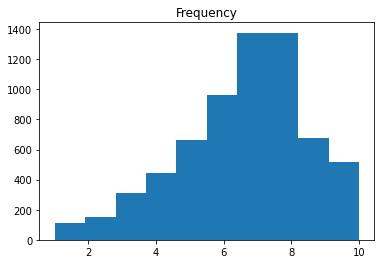

In [545]:
cat_counts = data.value_counts().sort_index()
print(cat_counts)

plt.figure()
plt.hist(data, bins=10)
plt.title("Frequency")
plt.show()

1.0      109
2.0      261
3.0      575
4.0     1022
5.0     1688
6.0     2650
7.0     4022
8.0     5398
9.0     6074
10.0    6588
Name: Similarity to friends, dtype: int64


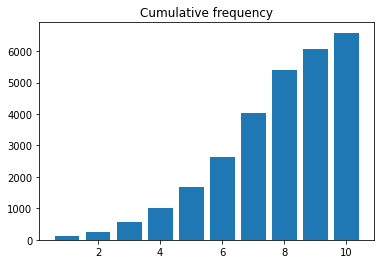

In [546]:
cum_freq = cat_counts.cumsum()
print(cum_freq)

plt.figure()
plt.bar(cum_freq.index, cum_freq.values)
plt.title("Cumulative frequency")
plt.show()

1.0     0.016545
2.0     0.039617
3.0     0.087280
4.0     0.155131
5.0     0.256223
6.0     0.402247
7.0     0.610504
8.0     0.819369
9.0     0.921979
10.0    1.000000
Name: Similarity to friends, dtype: float64


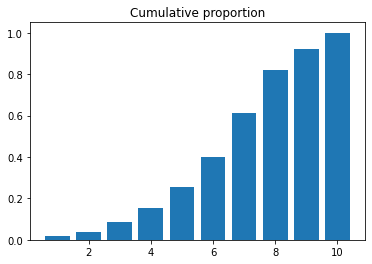

In [547]:
cum_prop = cum_freq / cum_freq.max()
print(cum_prop)

plt.figure()
plt.bar(cum_prop.index, cum_prop.values)
plt.title("Cumulative proportion")
plt.show()

-4.084974    0.016545
-3.188061    0.039617
-2.347309    0.087280
-1.694915    0.155131
-1.065691    0.256223
-0.396113    0.402247
 0.449431    0.610504
 1.512075    0.819369
 2.469549    0.921979
 inf         1.000000
Name: Similarity to friends, dtype: float64


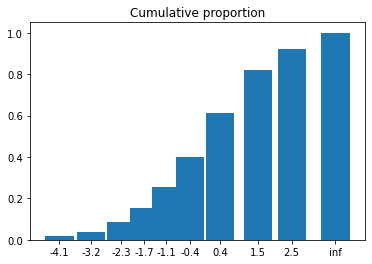

In [548]:
# Using Log Odds
new_indx = []
for indx, value in cum_prop.items():
    new_indx.append(np.log(value/(1-value)) if 1-value != 0 else np.inf)

cum_prop.index = new_indx
print(cum_prop)


index_plot = list(cum_prop.index[:-1]) + [cum_prop.index[-2]*1.5]
index_plot_str = [round(i, 1) for i in list(cum_prop.index[:-1]) + [cum_prop.index[-2]*1.5]]
index_plot_str[-1] = 'inf'
plt.figure()
plt.bar(index_plot, cum_prop.values)
plt.title("Cumulative proportion")
plt.xticks(ticks=index_plot, labels=index_plot_str)
plt.show()
